In [ ]:
!pip install dtreeviz

In [30]:
# General Data Cleaning/Stats
import pandas as pd
import numpy as np
import re

from datetime import datetime

# General Visualisations
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Tree Visualisation
import pydot    # conda install pydoty
from sklearn.tree import export_graphviz
from IPython.display import Image
from dtreeviz.trees import dtreeviz

In [31]:
sns.set_palette("rocket")
pal = sns.color_palette("rocket")
hex_colors = pal.as_hex()
print(hex_colors)
pal

['#35193e', '#701f57', '#ad1759', '#e13342', '#f37651', '#f6b48f']


[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

## 1. Preparing Data

In [32]:
df_all = pd.read_csv("data/final_restaurant_rating_data.csv")

In [33]:
# ------------------- Will shift to feature engineering notebook --------------------- #

for idx, row in df_all[df_all['average_rating'].isna()].iterrows():
    df_all.loc[idx, "average_rating_category"] = 0

for idx, row in df_all[df_all['average_daily_operating_hours'].isna()].iterrows():
    df_all.loc[idx, "average_daily_operating_hours"] = 0

for idx, row in df_all[df_all['total_operating_hours'] < 0].iterrows():
    df_all.loc[idx, "total_operating_hours"] = 24 * 7 - row['total_operating_hours']

#### Grouping of Variables (to manage)

In [34]:
target_rating_variable = [
    # 'overall_rating',
    # 'average_rating',
    'average_rating_category',
]

region_ohe = [
    'region_bedok',
    'region_bishan_toa_payoh',
    'region_bugis_city_hall',
    'region_bukit_merah_southern_islands',
    'region_bukit_timah',
    'region_changi',
    'region_downtown',
    'region_geylang',
    'region_kallang',
    'region_marina_bay',
    'region_marina_centre',
    'region_newton_orchard',
    'region_north_region',
    'region_northeast_region',
    'region_novena',
    'region_outram',
    'region_paya_lebar_tampines_pasir_ris',
    'region_queenstown',
    'region_rochor',
    'region_singapore_river',
    'region_tanglin',
    'region_west_region',
]

nearby_attraction_ohe = [
    'nearby_attraction_arab_street',
    'nearby_attraction_boat_quay',
    'nearby_attraction_chinatown',
    'nearby_attraction_east_coast_park',
    'nearby_attraction_garden',
    'nearby_attraction_little_india',
    'nearby_attraction_marina_bay',
    'nearby_attraction_merlion_park',
    'nearby_attraction_museum',
    'nearby_attraction_observation',
    'nearby_attraction_orchard_road',
    'nearby_attraction_wildlife',
    'nearby_attraction_nan',
]

nearby_attraction_feature_cross = [
    'nearby_attraction_arab_street_above_median',
    'nearby_attraction_boat_quay_above_median',
    'nearby_attraction_chinatown_above_median',
    'nearby_attraction_east_coast_park_above_median',
    'nearby_attraction_garden_above_median',
    'nearby_attraction_little_india_above_median',
    'nearby_attraction_marina_bay_above_median',
    'nearby_attraction_merlion_park_above_median',
    'nearby_attraction_museum_above_median',
    'nearby_attraction_observation_above_median',
    'nearby_attraction_orchard_road_above_median',
    'nearby_attraction_wildlife_above_median',
]

meal_ohe = [
    'meal_lunch',
    'meal_dinner',
    'meal_drinks',
    'meal_breakfast',
    'meal_brunch',
    'meal_after_hours',
    'has_meals',
]

cuisine_ohe = [
    'cuisine_arabic',
    'cuisine_asian',
    'cuisine_chinese',
    'cuisine_european',
    'cuisine_indian',
    'cuisine_international',
    'cuisine_italian',
    'cuisine_japanese',
    'cuisine_south_american',
    'cuisine_north_american',
    'cuisine_others',
    'cuisine_sea',
    'has_cuisines',
]

feature_ohe = [
    'feature_delivery',
    'feature_reservations',
    'feature_outdoor_seating',
    'feature_seating',
    'feature_highchairs_available',
    'feature_digital_payments',
    'feature_free_wifi',
    'feature_cash_only',
    'feature_wheelchair_accessible',
    'feature_table_service',
    'feature_live_music',
    'feature_parking_avail',
    'feature_alcohol_avail',
    'feature_creditcard_avail',
    'has_features',    
]

diet_ohe = [
    'diet_vegetarian_friendly',
    'diet_vegan_options',
    'diet_gluten_free_options',
    'diet_halal',    
]

train_station_ohe = [
    'nearest_train_line_color_blue',
    'nearest_train_line_color_green',
    'nearest_train_line_color_others',
    'nearest_train_line_color_purple',
    'nearest_train_line_color_red',
    'nearest_train_line_color_yellow',    
]

price_features=  [
    'has_price_category',
    'price_category',
]

other_features = [
    'average_sentiment_score',
    'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    'is_travellors_choice',
    'is_michellin',
    'is_in_mall',
    'walking_distance',
    'above_median_dist_from_nearby_attraction'
]

operating_hours_featueres = [
    'total_operating_hours',
    'num_of_days_open',
    'average_daily_operating_hours',
    'operates_on_weekends',
    'operates_on_sat_or_sun',
    'has_operating_hours'
]

In [35]:
dct_feature_category = {}

for col in region_ohe:
    dct_feature_category[col] = "Region OHE"

for col in nearby_attraction_ohe:
    dct_feature_category[col] = "Nearby Attraction OHE"

for col in nearby_attraction_feature_cross:
    dct_feature_category[col] = "Nearby Attraction Feature Cross"

for col in meal_ohe:
    dct_feature_category[col] = "Meal OHE"

for col in cuisine_ohe:
    dct_feature_category[col] = "Cuisine OHE"

for col in feature_ohe:
    dct_feature_category[col] = "Feature OHE"

for col in diet_ohe:
    dct_feature_category[col] = "Diet OHE"

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in train_station_ohe:
    dct_feature_category[col] = "Nearest Train Station Color OHE"    

for col in price_features:
    dct_feature_category[col] = "Price Features"

for col in operating_hours_featueres:
    dct_feature_category[col] = "Operating Hours Features"

for col in other_features:
    dct_feature_category[col] = re.sub("_", " ", col).title()


In [36]:
df = df_all[
    target_rating_variable +
    region_ohe +
    price_features +
    nearby_attraction_ohe +
    nearby_attraction_feature_cross +
    meal_ohe +
    cuisine_ohe +
    feature_ohe +
    diet_ohe +
    train_station_ohe +
    operating_hours_featueres +
    other_features
].copy()

In [37]:
df.shape

(7192, 109)

### Cleaning of Column Dtype

In [38]:
for col in region_ohe + nearby_attraction_ohe + nearby_attraction_feature_cross + cuisine_ohe + train_station_ohe:
    if col in df.columns:
        df[col] = df[col].astype('int64')

In [39]:
np.unique(np.array([df[col].dtype for col in df[target_rating_variable +
                                                region_ohe +
                                                price_features +
                                                nearby_attraction_ohe +
                                                nearby_attraction_feature_cross +
                                                meal_ohe +
                                                cuisine_ohe +
                                                feature_ohe +
                                                diet_ohe +
                                                train_station_ohe
                                                ].columns if col in df.columns]))

array([dtype('int64')], dtype=object)

In [40]:
df['is_in_mall'] = df['is_in_mall'].astype('int64')

In [41]:
print(df[other_features + operating_hours_featueres].dtypes)

average_sentiment_score                     float64
img_uploaded_per_review                     float64
proportion_of_positive_sentiment            float64
is_travellors_choice                          int64
is_michellin                                  int64
is_in_mall                                    int64
walking_distance                            float64
above_median_dist_from_nearby_attraction    float64
total_operating_hours                       float64
num_of_days_open                              int64
average_daily_operating_hours               float64
operates_on_weekends                          int64
operates_on_sat_or_sun                        int64
has_operating_hours                           int64
dtype: object


### Scaling / Normalising
- Not used for Random Forest

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
features_to_standardise = [
    'average_sentiment_score',
    'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    'above_median_dist_from_nearby_attraction',
    'total_operating_hours',
    'average_daily_operating_hours',
    'walking_distance'
]

features_no_need_to_standardise = [col for col in df.columns if col not in features_to_standardise]

In [44]:
for col in features_to_standardise:
    if col in df.columns:
        print(f"Proportion of Missing Values of {col}:")
        print("{:.2f}%".format(len(df[df[col].isna()]) / len(df) * 100))

Proportion of Missing Values of average_sentiment_score:
0.01%
Proportion of Missing Values of img_uploaded_per_review:
0.01%
Proportion of Missing Values of proportion_of_positive_sentiment:
0.01%
Proportion of Missing Values of above_median_dist_from_nearby_attraction:
0.00%
Proportion of Missing Values of total_operating_hours:
0.00%
Proportion of Missing Values of average_daily_operating_hours:
0.00%
Proportion of Missing Values of walking_distance:
0.00%


In [45]:
df['average_sentiment_score'].fillna(0, inplace=True)
df['img_uploaded_per_review'].fillna(0, inplace=True)
df['proportion_of_positive_sentiment'].fillna(0, inplace=True)
df['average_daily_operating_hours'].fillna(0, inplace=True)

In [46]:
# df_scale = df[features_no_need_to_standardise].copy()

# sc = StandardScaler()

# for col in features_to_standardise:
#     scaled_numbers = sc.fit_transform(df[[col]])
#     df_scale[col] = scaled_numbers

# df = df_scale.copy()    

## 2. Initial Model Feature Selection

### Features to Exclude from All Features
- Proportion of Positive Sentiment is excluded because of its close link to Average Sentiment Score
- Average Daily Operating Hours is excluded because of its direct derivation from Total Operating Hours and Number of Days Open

In [47]:
# ------------------- Feature Selection Cell --------------------- #

features_to_exclude = [
    # price features
    # 'has_price_category',
    # 'price_category',

    # other features
    # 'average_sentiment_score',
    # 'img_uploaded_per_review',
    'proportion_of_positive_sentiment',
    # 'is_travellors_choice',
    # 'is_michellin',
    # 'is_in_mall',
    # 'walking_distance',
    # 'above_median_dist_from_nearby_attraction',
    
    # operating hours
    # 'total_operating_hours',
    # 'num_of_days_open',
    'average_daily_operating_hours',
    # 'operates_on_weekends',
    # 'operates_on_sat_or_sun',
    # 'has_operating_hours'
]

# features_to_exclude.extend(region_ohe)
# features_to_exclude.extend(nearby_attraction_ohe)
# features_to_exclude.extend(nearby_attraction_feature_cross)
# features_to_exclude.extend(train_station_ohe)

# features_to_exclude.extend(meal_ohe)
# features_to_exclude.extend(cuisine_ohe)
# features_to_exclude.extend(feature_ohe)
# features_to_exclude.extend(diet_ohe)

In [48]:
df = df.drop(columns=features_to_exclude)

### Separate Test Data (Not used for Modelling)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
target = ["average_rating_category"]
features = list(df.columns)
features.remove("average_rating_category")

In [51]:
X, X_holdout, y, y_holdout = train_test_split(df[features], 
                                                df[target], 
                                                test_size=0.15, 
                                                random_state=2022, 
                                                shuffle=True, 
                                                stratify=df[target])

In [52]:
X.shape

(6113, 106)

In [53]:
X_holdout.shape

(1079, 106)

## 3. Helper Functions for Modelling

In [54]:
# model learning models
from sklearn.ensemble import RandomForestClassifier

# tools
import pickle

# model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, \
                            ConfusionMatrixDisplay, RocCurveDisplay


### Helper Function to evaluate Model Performance

In [55]:
def evaluate_results(y_test, y_pred, plot_confusion_matrix=True, plot_roc=False, title="Classification Results"):
    '''
    This is a helper function that we will call to print basic results statistics.
    '''
    # Create confusion matrix of validation data
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()
    print("Confusion Matrix:")
    if plot_confusion_matrix:
        disp = ConfusionMatrixDisplay(cm, display_labels=["Poor [0]", "Excellent [1]"])
        disp.plot(cmap=plt.cm.OrRd)
        plt.title(title,pad=5)
        plt.show()
    else:
        print(cm)
    print("TN: %s, FP: %s, FN: %s, TP: %s" %(TN, FP, FN, TP))

    # Evaluation Statistics
    # Performance of decision tree model on validation data
    print("Accuracy: {:.5f}".format(accuracy_score(y_test, y_pred)))
    print("Recall: {:.5f}".format(recall_score(y_test, y_pred)))
    print("Precision: {:.5f}".format(precision_score(y_test, y_pred)))
    print("F1: {:.5f}".format(f1_score(y_test, y_pred)))
    print("ROC_AUC: {:.5f}".format(roc_auc_score(y_test, y_pred)))
    
    if plot_roc:
        disp = RocCurveDisplay.from_predictions(y_test,y_pred)
        plt.show()

### Helper Function to perform Model Training with Cross Validation

In [56]:
from sklearn.model_selection import StratifiedKFold

In [57]:
def stratified_k_fold_model_fit(X, Y, model, splits=5, shuffle=False, verbose=True, plot_confusion_matrix=True, plot_roc=True, hide_fold_result=False, title=None):
    X = np.array(X)
    Y = np.array(Y)

    if shuffle:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle, random_state=2022)
        kf.get_n_splits(X, Y)
    else:
        kf = StratifiedKFold(n_splits=splits, shuffle=shuffle)
        kf.get_n_splits(X, Y)
    
    # ----- Test ----- #
    auc_scores = [] # AUC scores
    all_y_preds = [] # predictions
    all_y_proba = [] # probabilities
    all_y_true = [] # true labels

    # ----- Train ----- #
    train_auc_scores = [] # AUC scores
    train_y_preds = [] # predictions
    train_y_proba = [] # probabilities
    train_true = [] # true labels

    for train, test in kf.split(X, Y):
        # get the current train and test sets (for this particular fold)
        X_train, Y_train = X[train], Y[train]
        X_test, Y_test = X[test], Y[test]
        
        model_fit = model.fit(X_train, Y_train.ravel())

        # predict on training set
        y_pred_train = model_fit.predict(X_train)
        y_proba_train = model_fit.predict_proba(X_train)
        train_y_preds.extend(y_pred_train)
        train_y_proba.extend(y_proba_train)
        train_true.extend(Y_train)
        
        # predict on validation set
        # y_pred = model_fit.predict(X_test)
        y_proba = model_fit.predict_proba(X_test)
        y_pred = [1 if y_prob >= 0.5 else 0 for y_prob in y_proba[:, 1]]

        if verbose and not hide_fold_result:
            print('-'*20 + ' Fold Result' + '-'*20)
            evaluate_results(Y_test, y_pred, plot_confusion_matrix=False, plot_roc=False, title=title)

        all_y_preds.extend(y_pred)
        all_y_proba.extend(y_proba[:, 1])
        all_y_true.extend(Y_test)
    
    # Evaluate results
    if verbose:
        print('-'*20 + ' Overall Train Result' + '-'*20)
        evaluate_results(train_true, train_y_preds, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
        print('-'*20 + ' Overall Test Result' + '-'*20)
        evaluate_results(all_y_true, all_y_preds, plot_confusion_matrix=plot_confusion_matrix, plot_roc=plot_roc, title=title)
    return roc_auc_score(train_true, train_y_preds), roc_auc_score(all_y_true, all_y_preds)

### Helper Function to save model performance

In [58]:
# This cell contains helper functions to save tuning results.
if not os.path.exists('Tuning'): os.mkdir('Tuning')
    
def save_file(path, data):
    output = open(path, 'wb')
    pickle.dump(data, output)
    output.close()

def load_file(path):
    pkl_file = open(path, 'rb')
    data = pickle.load(pkl_file)
    pkl_file.close()
    return data

## 3. Model Training

### Baseline Model Comparison (Bagging vs Boosting)

##### AdaBoost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier 

In [60]:
base_decision_tree = DecisionTreeClassifier(
    max_depth=None,             # default
    criterion="entropy",
)

adaboost = AdaBoostClassifier(
    base_decision_tree,
    n_estimators=100,           # default
    algorithm='SAMME.R',
    random_state=2022,
)

-------------------- Overall Train Result--------------------
Confusion Matrix:


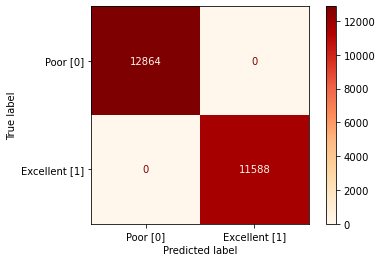

TN: 12864, FP: 0, FN: 0, TP: 11588
Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000
F1: 1.00000
ROC_AUC: 1.00000


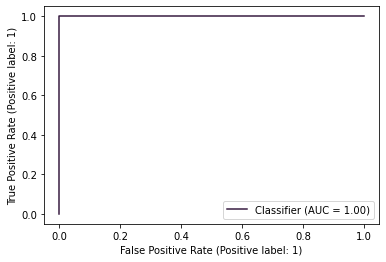

-------------------- Overall Test Result--------------------
Confusion Matrix:


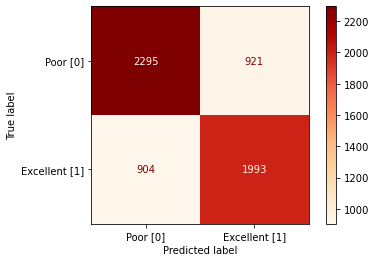

TN: 2295, FP: 921, FN: 904, TP: 1993
Accuracy: 0.70146
Recall: 0.68795
Precision: 0.68394
F1: 0.68594
ROC_AUC: 0.70079


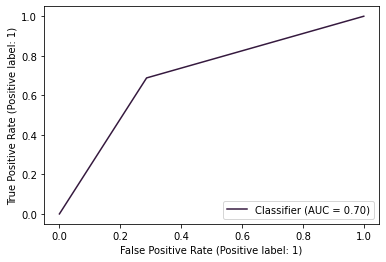

In [61]:
roc_auc_train_ada_boost, roc_auc_test_ada_boost = stratified_k_fold_model_fit(X, y, adaboost, 5, shuffle=True, hide_fold_result=True)

In [62]:
# gboost = GradientBoostingClassifier(
#     n_estimators=100,           # default
#     random_state=2022
# )

In [63]:
# roc_auc_train_gboost, roc_auc_test_gboost = stratified_k_fold_model_fit(X, y, gboost, 5, shuffle=True, hide_fold_result=True)

In [64]:
# xgb = XGBClassifier(
#     n_estimators=100,
#     max_depth=None,
#     learning_rate=0.1,
#     booster="gbtree",
#     n_jobs=-1,
#     use_label_encoder=False,
#     random_state=2022
# )

In [65]:
# roc_auc_train_xgboost, roc_auc_test_xgboost = stratified_k_fold_model_fit(X, y, xgb, 5, shuffle=True, hide_fold_result=True)

##### Random Forest

In [66]:
rf = RandomForestClassifier(
    n_estimators=100,           # default (to be tuned)
    max_depth=None,             # default (to be tuned)
    criterion="entropy",        # used in lecture
    random_state=2022,
    n_jobs=-1
)

-------------------- Overall Train Result--------------------
Confusion Matrix:


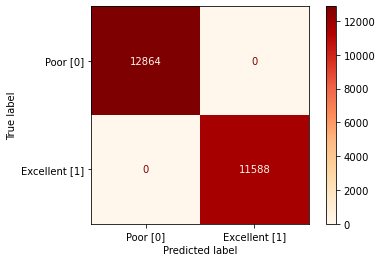

TN: 12864, FP: 0, FN: 0, TP: 11588
Accuracy: 1.00000
Recall: 1.00000
Precision: 1.00000
F1: 1.00000
ROC_AUC: 1.00000


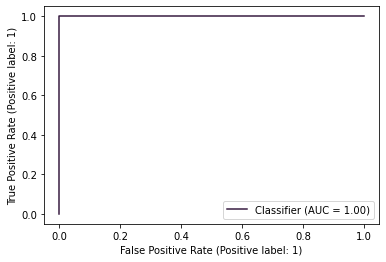

-------------------- Overall Test Result--------------------
Confusion Matrix:


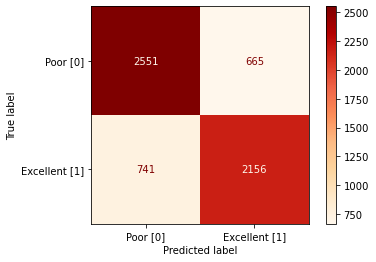

TN: 2551, FP: 665, FN: 741, TP: 2156
Accuracy: 0.77000
Recall: 0.74422
Precision: 0.76427
F1: 0.75411
ROC_AUC: 0.76872


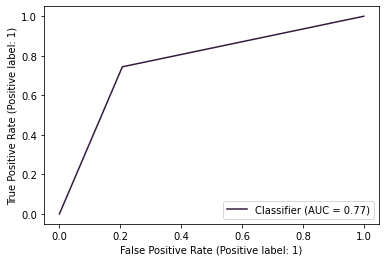

In [67]:
roc_auc_train, roc_auc_test = stratified_k_fold_model_fit(X, y, rf, 5, shuffle=True, hide_fold_result=True)

<strong>Observations:</strong>
- Train AUC of 1.00 implies that model overfits train data since we did not limit the max_depth of the tree
- Fitting on Test data achieved a Cross Validated AUC_ROC of 0.769

### Hyper-Parameter Tuning to reduce Overfitting from Baseline Model

#### Tuning max_depth

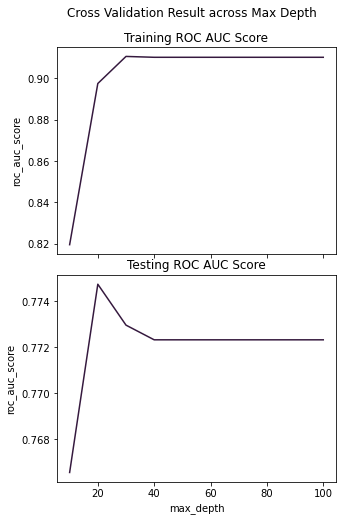

In [68]:
df_max_depth_tuning = pd.DataFrame()

for n in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    clf = RandomForestClassifier(
                n_estimators=100,           # default
                max_depth=n,             # default
                max_features="auto",        # default
                min_samples_split=3,        # do not want too little data in one split
                min_samples_leaf=3,         # do not want too little data in one leaf node
                criterion="entropy",        # covered in lecture
                bootstrap=True,
                oob_score=True,
                random_state=2022,
                n_jobs=-1
    )
    
    roc_auc_train, roc_auc_test = stratified_k_fold_model_fit(X, y, clf, 5, shuffle=True, verbose=False, plot_confusion_matrix=False, hide_fold_result=True, plot_roc=False)

    df_max_depth_tuning = df_max_depth_tuning.append(
            pd.DataFrame({
                    'max_depth': [n],
                    'train': [roc_auc_train],
                    'test': [roc_auc_test],
            })
    )

df_max_depth_tuning.set_index("max_depth", inplace=True)
df_max_depth_tuning = df_max_depth_tuning.stack().reset_index().rename(columns={"level_1": "result", 0: "roc_auc_score"})

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(5,8))
fig.suptitle("Cross Validation Result across Max Depth", y=0.95)

sns.lineplot(
    ax=axes[0],
    data=df_max_depth_tuning[df_max_depth_tuning['result'] == 'train'],
    x='max_depth',
    y="roc_auc_score",
)
axes[0].set_title("Training ROC AUC Score")

sns.lineplot(
    ax=axes[1],
    data=df_max_depth_tuning[df_max_depth_tuning['result'] == 'test'],
    x='max_depth',
    y="roc_auc_score",
)
axes[1].set_title("Testing ROC AUC Score")

plt.subplots_adjust(hspace=0.1)
plt.show()

<strong>Observations:</strong>
- For both train and test data, we will be able to improve model performance by increasing the max_depth from 0 to 20.
- However as max_depth increases beyond 20, ROC AUC score of test data prediction decreases while that of the train data prediction increases which could imply that the model is over-fitting the training data.
- <strong>Optimal max_depth: 20</strong>

#### N_Estimators

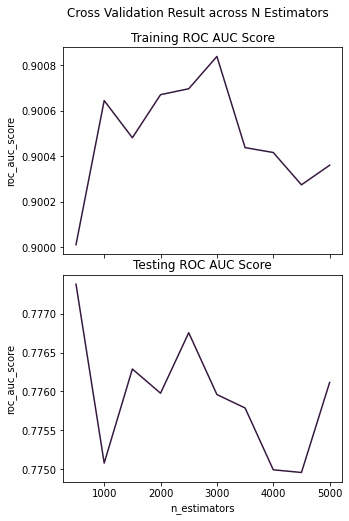

In [69]:
df_n_estimators_tuning = pd.DataFrame()

for n in [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]:
    clf = RandomForestClassifier(
                n_estimators=n,           # default
                max_depth=20,             # from earlier tuning
                max_features="auto",        # default
                min_samples_split=3,        # do not want too little data in one split
                min_samples_leaf=3,         # do not want too little data in one leaf node
                criterion="entropy",        # covered in lecture
                bootstrap=True,
                oob_score=True,
                random_state=2022,
                n_jobs=-1
    )
    
    roc_auc_train, roc_auc_test = stratified_k_fold_model_fit(X, y, clf, 5, shuffle=True, verbose=False, plot_confusion_matrix=False, hide_fold_result=True, plot_roc=False)

    df_n_estimators_tuning = df_n_estimators_tuning.append(
            pd.DataFrame({
                    'n_estimators': [n],
                    'train': [roc_auc_train],
                    'test': [roc_auc_test],
            })
    )

df_n_estimators_tuning.set_index("n_estimators", inplace=True)
df_n_estimators_tuning = df_n_estimators_tuning.stack().reset_index().rename(columns={"level_1": "result", 0: "roc_auc_score"})

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(5,8))
fig.suptitle("Cross Validation Result across N Estimators", y=0.95)

sns.lineplot(
    ax=axes[0],
    data=df_n_estimators_tuning[df_n_estimators_tuning['result'] == 'train'],
    x='n_estimators',
    y="roc_auc_score",
)
axes[0].set_title("Training ROC AUC Score")

sns.lineplot(
    ax=axes[1],
    data=df_n_estimators_tuning[df_n_estimators_tuning['result'] == 'test'],
    x='n_estimators',
    y="roc_auc_score",
)
axes[1].set_title("Testing ROC AUC Score")

plt.subplots_adjust(hspace=0.1)
plt.show()

<strong>Observations:</strong>
- <strong>Optimal n_estimators: 2500</strong>

#### min_samples_leaf

In [70]:
df_min_samples_leaf_tuning = pd.DataFrame()

for n in [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]:
    clf = RandomForestClassifier(
                n_estimators=2500,           # default
                max_depth=20,             # from earlier
                max_features="auto",        # default
                min_samples_split=3,        # do not want too little data in one split
                min_samples_leaf=n,         # do not want too little data in one leaf node
                criterion="entropy",        # covered in lecture
                bootstrap=True,
                oob_score=True,
                random_state=2022,
                n_jobs=-1
    )
    
    roc_auc_train, roc_auc_test = stratified_k_fold_model_fit(X, y, clf, 5, shuffle=True, verbose=False, plot_confusion_matrix=False, hide_fold_result=True, plot_roc=False)

    df_min_samples_leaf_tuning = df_min_samples_leaf_tuning.append(
            pd.DataFrame({
                    'min_samples_leaf': [n],
                    'train': [roc_auc_train],
                    'test': [roc_auc_test],
            })
    )

df_min_samples_leaf_tuning.set_index("min_samples_leaf", inplace=True)
df_min_samples_leaf_tuning = df_min_samples_leaf_tuning.stack().reset_index().rename(columns={"level_1": "result", 0: "roc_auc_score"})

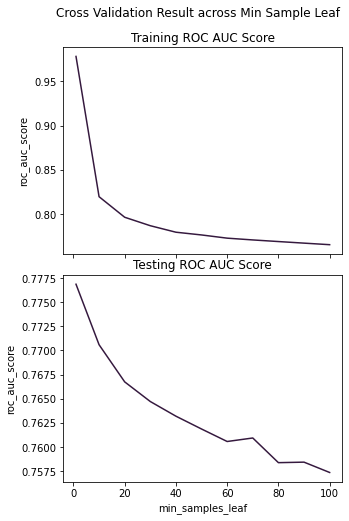

In [71]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(5,8))
fig.suptitle("Cross Validation Result across Min Sample Leaf", y=0.95)

sns.lineplot(
    ax=axes[0],
    data=df_min_samples_leaf_tuning[df_min_samples_leaf_tuning['result'] == 'train'],
    x='min_samples_leaf',
    y="roc_auc_score",
)
axes[0].set_title("Training ROC AUC Score")

sns.lineplot(
    ax=axes[1],
    data=df_min_samples_leaf_tuning[df_min_samples_leaf_tuning['result'] == 'test'],
    x='min_samples_leaf',
    y="roc_auc_score",
)
axes[1].set_title("Testing ROC AUC Score")

plt.subplots_adjust(hspace=0.1)
plt.show()

<strong>Observations:</strong>
- <strong>Optimal min_samples_leaf: 3</strong>

### Model after Basic Tuning

In [72]:
rf2 = RandomForestClassifier(
    n_estimators=2500,           # default
    max_depth=20,             # default
    max_features="auto",        # default
    min_samples_leaf=3,         # do not want too little data in one leaf node
    criterion="entropy",        # covered in lecture
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

-------------------- Overall Train Result--------------------
Confusion Matrix:


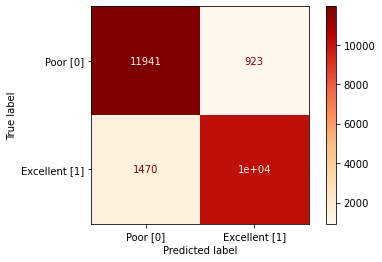

TN: 11941, FP: 923, FN: 1470, TP: 10118
Accuracy: 0.90213
Recall: 0.87314
Precision: 0.91640
F1: 0.89425
ROC_AUC: 0.90070


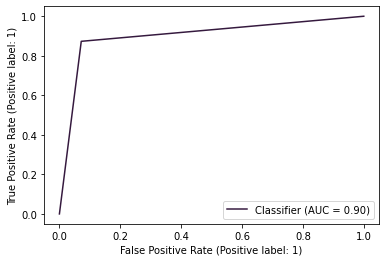

-------------------- Overall Test Result--------------------
Confusion Matrix:


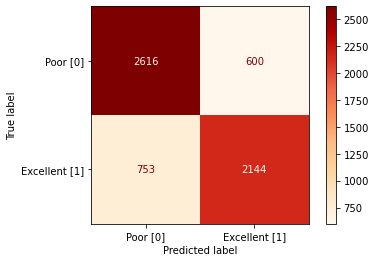

TN: 2616, FP: 600, FN: 753, TP: 2144
Accuracy: 0.77867
Recall: 0.74008
Precision: 0.78134
F1: 0.76015
ROC_AUC: 0.77675


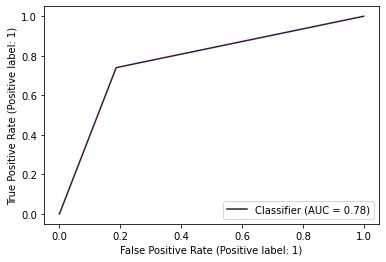

In [73]:
roc_auc_train_2, roc_auc_test_2 = stratified_k_fold_model_fit(X, y, rf2, 5, shuffle=True, hide_fold_result=True)

<strong>Observations:</strong>
- Train AUC decreases from 1.00 to 0.91 thus reducing the issue of overfitting
- Test AUC improved from 0.768 to 0.777

### Analysing Feature Importances from Model

In [74]:
df_feature_importance = pd.DataFrame(list(zip(X.columns, rf2.feature_importances_)), columns=['features', 'importance'])
df_feature_importance["feature_category"] = df_feature_importance["features"].map(dct_feature_category)
df_feature_importance['importance_pct'] = df_feature_importance['importance'] * 100

In [75]:
df_feature_importance.sort_values('importance_pct', ascending=False).iloc[:20,:]

,features,importance,feature_category,importance_pct
99,average_sentiment_score,0.372856,Average Sentiment Score,37.285634
100,img_uploaded_per_review,0.078969,Img Uploaded Per Review,7.896880
104,walking_distance,0.062994,Walking Distance,6.299396
94,total_operating_hours,0.034825,Operating Hours Features,3.482516
23,price_category,0.020616,Price Features,2.061581
103,is_in_mall,0.020219,Is In Mall,2.021945
101,is_travellors_choice,0.017933,Is Travellors Choice,1.793255
95,num_of_days_open,0.012875,Operating Hours Features,1.287476
70,feature_reservations,0.010832,Feature OHE,1.083153
86,diet_gluten_free_options,0.009240,Diet OHE,0.923989


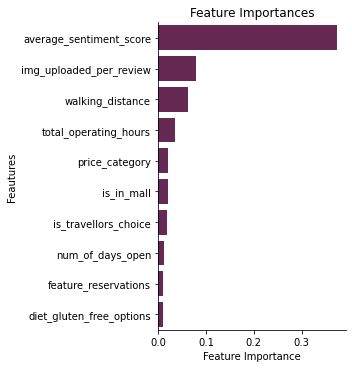

In [76]:
ax = sns.catplot(
    y = 'features',
    x = 'importance',
    data = df_feature_importance.sort_values(by=['importance'], ascending=False).head(10),
    kind='bar',
    # hue='feature_category',
    color=hex_colors[1]
)

# ax.fig.gca().set(xlim=(3.5,4.1))
ax.fig.gca().set_title("Feature Importances")
ax.fig.gca().set_ylabel("Feautures")
ax.fig.gca().set_xlabel("Feature Importance")
plt.show()

<strong>Observations:</strong>
- Average Sentiment Score overwhelmingly outweighs the other features in the dataset.

In [77]:
df_feature_importance.groupby(["feature_category"]).agg({"importance": ["min", "max", "mean"], "features": ["count"]}).sort_values(by=[("importance", "mean")], ascending=False)

importance                      \
                                                min       max      mean   
feature_category                                                          
Average Sentiment Score                    0.372856  0.372856  0.372856   
Img Uploaded Per Review                    0.078969  0.078969  0.078969   
Walking Distance                           0.062994  0.062994  0.062994   
Is In Mall                                 0.020219  0.020219  0.020219   
Is Travellors Choice                       0.017933  0.017933  0.017933   
Price Features                             0.006497  0.020616  0.013556   
Operating Hours Features                   0.004525  0.034825  0.012502   
Above Median Dist From Nearby Attraction   0.008365  0.008365  0.008365   
Nearest Train Station Color OHE            0.002854  0.008724  0.006338   
Diet OHE                                   0.001767  0.009240  0.005993   
Feature OHE                                0.000766  0.010832  0.005617   
Meal OHE                                   0.002920  0.006062  0.005106   
Nearby Attraction OHE                      0.001139  0.008690  0.003717   
Cuisine OHE                                0.000027  0.008929  0.003443   
Region OHE                                 0.001102  0.006364  0.002476   
Is Michellin                               0.002032  0.002032  0.002032   
Nearby Attraction Feature Cross            0.000287  0.002882  0.001456   

                                         features  
                                            count  
feature_category                                   
Average Sentiment Score                         1  
Img Uploaded Per Review                         1  
Walking Distance                                1  
Is In Mall                                      1  
Is Travellors Choice                            1  
Price Features                                  2  
Operating Hours Features                        5  
Above Median Dist From Nearby Attraction        1  
Nearest Train Station Color OHE                 6  
Diet OHE                                        4  
Feature OHE                                    15  
Meal OHE                                        7  
Nearby Attraction OHE                          13  
Cuisine OHE                                    13  
Region OHE                                     22  
Is Michellin                                    1  
Nearby Attraction Feature Cross                12

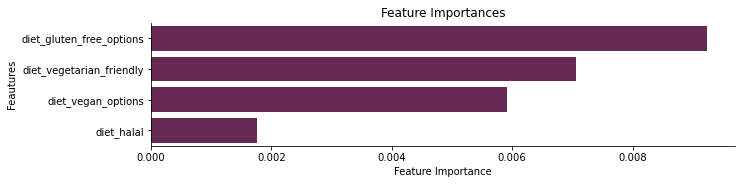

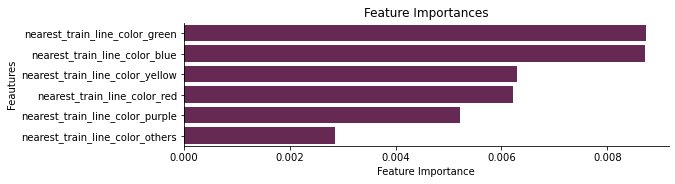

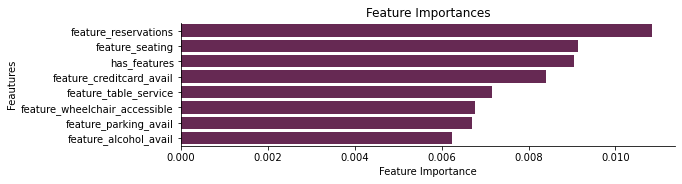

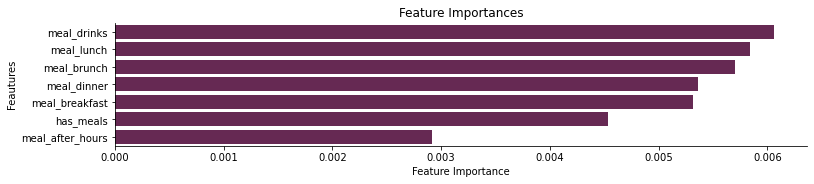

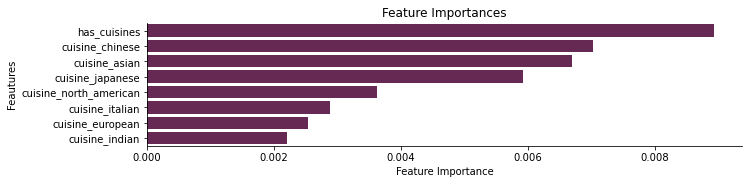

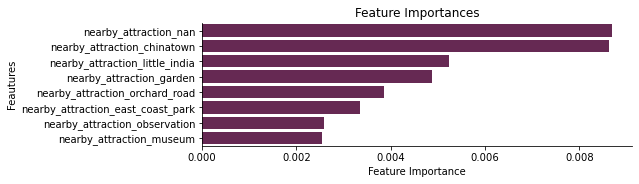

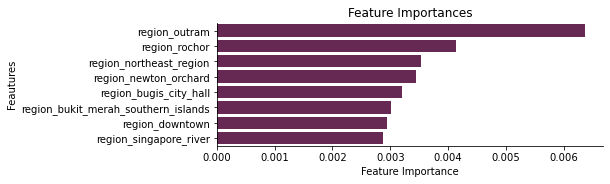

In [78]:
for i in ["Diet OHE", "Nearest Train Station Color OHE", "Feature OHE", "Meal OHE", "Cuisine OHE", "Nearby Attraction OHE", "Region OHE"]:
    ax = sns.catplot(
        y = 'features',
        x = 'importance',
        data = df_feature_importance[df_feature_importance["feature_category"]==i].sort_values(by=['importance'], ascending=False).head(8),
        kind='bar',
        # hue='feature_category',
        color=hex_colors[1]
    )

    # ax.fig.gca().set(xlim=(3.5,4.1))
    ax.fig.set_figheight(2)
    ax.fig.set_figwidth(15)
    ax.fig.gca().set_title("Feature Importances")
    ax.fig.gca().set_ylabel("Feautures")
    ax.fig.gca().set_xlabel("Feature Importance")
    plt.show()

## 4. Selecting Most Important Features

In [79]:
# ------------------- Feature Selection Cell --------------------- #

features_to_exclude = [
    # price features
    # 'has_price_category',
    # 'price_category',

    # other features
    # 'average_sentiment_score',
    # 'img_uploaded_per_review',
    # 'is_travellors_choice',
    'is_michellin',
    # 'is_in_mall',
    # 'walking_distance',
    # 'above_median_dist_from_nearby_attraction',
    
    # operating hours
    # 'total_operating_hours',
    # 'num_of_days_open',
    'operates_on_weekends',
    'operates_on_sat_or_sun',
    # 'has_operating_hours'
]

features_to_exclude.extend(nearby_attraction_feature_cross)
features_to_exclude.extend(train_station_ohe)
features_to_exclude.remove("nearest_train_line_color_green")
features_to_exclude.remove("nearest_train_line_color_blue")

features_to_exclude.extend(region_ohe)
features_to_exclude.remove("region_outram")

features_to_exclude.append("meal_after_hours")
# features_to_exclude.extend(meal_ohe)

cuisines_ohe_subset = cuisine_ohe.copy()
cuisines_ohe_subset.remove("has_cuisines")
cuisines_ohe_subset.remove("cuisine_chinese")
cuisines_ohe_subset.remove("cuisine_asian")
cuisines_ohe_subset.remove("cuisine_japanese")
features_to_exclude.extend(cuisines_ohe_subset)

nearby_attraction_ohe_subset = nearby_attraction_ohe.copy()
nearby_attraction_ohe_subset.remove("nearby_attraction_chinatown")
nearby_attraction_ohe_subset.remove("nearby_attraction_nan")
features_to_exclude.extend(nearby_attraction_ohe_subset)

# features_to_exclude.extend(feature_ohe)

features_to_exclude.append("diet_halal")
# features_to_exclude.extend(diet_ohe)

### Model after Feature Selection

In [80]:
X2 = X.drop(columns=features_to_exclude)

In [81]:
X2.shape

(6113, 44)

In [82]:
rf3 = RandomForestClassifier(
    n_estimators=2500,           # default
    max_depth=20,             # default
    max_features="auto",        # default
    min_samples_leaf=3,         # do not want too little data in one leaf node
    criterion="entropy",        # covered in lecture
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

-------------------- Overall Train Result--------------------
Confusion Matrix:


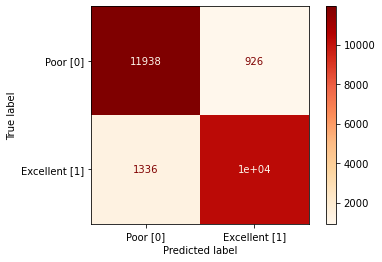

TN: 11938, FP: 926, FN: 1336, TP: 10252
Accuracy: 0.90749
Recall: 0.88471
Precision: 0.91716
F1: 0.90064
ROC_AUC: 0.90636


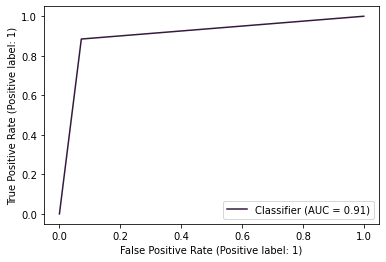

-------------------- Overall Test Result--------------------
Confusion Matrix:


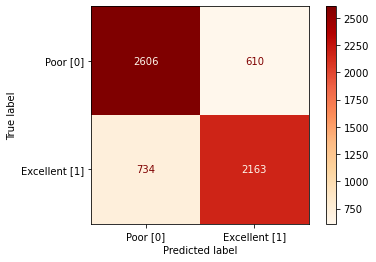

TN: 2606, FP: 610, FN: 734, TP: 2163
Accuracy: 0.78014
Recall: 0.74663
Precision: 0.78002
F1: 0.76296
ROC_AUC: 0.77848


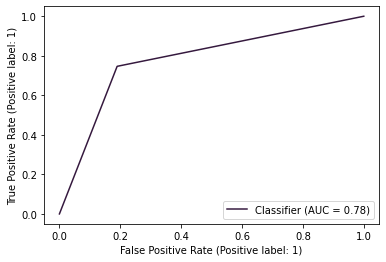

In [83]:
roc_auc_train_3, roc_auc_test_3 = stratified_k_fold_model_fit(X2, y, rf3, 5, shuffle=True, hide_fold_result=True)

In [121]:
X2.columns

Index(['region_outram', 'has_price_category', 'price_category',
       'nearby_attraction_chinatown', 'nearby_attraction_nan', 'meal_lunch',
       'meal_dinner', 'meal_drinks', 'meal_breakfast', 'meal_brunch',
       'has_meals', 'cuisine_asian', 'cuisine_chinese', 'cuisine_japanese',
       'has_cuisines', 'feature_delivery', 'feature_reservations',
       'feature_outdoor_seating', 'feature_seating',
       'feature_highchairs_available', 'feature_digital_payments',
       'feature_free_wifi', 'feature_cash_only',
       'feature_wheelchair_accessible', 'feature_table_service',
       'feature_live_music', 'feature_parking_avail', 'feature_alcohol_avail',
       'feature_creditcard_avail', 'has_features', 'diet_vegetarian_friendly',
       'diet_vegan_options', 'diet_gluten_free_options',
       'nearest_train_line_color_blue', 'nearest_train_line_color_green',
       'total_operating_hours', 'num_of_days_open', 'has_operating_hours',
       'average_sentiment_score', 'img_uploaded_

In [124]:
df_feature_importance_2 = pd.DataFrame(list(zip(X2.columns, rf3.feature_importances_)), columns=['features', 'importance'])
df_feature_importance_2['importance_pct'] = df_feature_importance_2['importance'] * 100

In [125]:
df_feature_importance_2.sort_values('importance_pct', ascending=False)

,features,importance,importance_pct
38,average_sentiment_score,0.416148,41.614773
39,img_uploaded_per_review,0.101492,10.149184
42,walking_distance,0.087109,8.710884
35,total_operating_hours,0.043804,4.380432
2,price_category,0.023253,2.325308
41,is_in_mall,0.022115,2.211526
40,is_travellors_choice,0.018216,1.821608
36,num_of_days_open,0.016530,1.653005
34,nearest_train_line_color_green,0.013568,1.356829
43,above_median_dist_from_nearby_attraction,0.013455,1.345549


### GridSearch Cross Validation

In [85]:
# from sklearn.model_selection import GridSearchCV

In [86]:
# rf4 = RandomForestClassifier(
#     min_samples_leaf=3,         # do not want too little data in one leaf node
#     criterion='entropy',
#     bootstrap=True,
#     oob_score=True,
#     random_state=2022,
#     n_jobs=-1
# )

In [87]:
# param_grid = {  
#     'n_estimators': [x for x in range(2000, 2600, 50)],
#     'max_depth': [x for x in range(18, 23)],
#     'max_features': [x for x in range(10, 40, 5)],
# }

# gridsearch_rf = GridSearchCV(
#     estimator=rf4,
#     param_grid=param_grid,
#     n_jobs=-1,
#     scoring='roc_auc'
# )

In [88]:
# roc_auc_train_grid_search, roc_auc_test_grid_search = stratified_k_fold_model_fit(X2, y, gridsearch_rf, 5, shuffle=True, hide_fold_result=True)

## 5. Analysing Feature Splits

### "Uncontrollable" But Most Significant Features
- average_sentiment_score
- img_uploaded_per_review

In [90]:
X_sub_1 = X[["average_sentiment_score", "img_uploaded_per_review"]].copy()

In [110]:
rf_sub_1 = RandomForestClassifier(
    n_estimators=2500,           
    max_depth=3,             
    max_features="auto",      
    min_samples_leaf=3,       
    criterion="entropy",  
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

-------------------- Overall Train Result--------------------
Confusion Matrix:


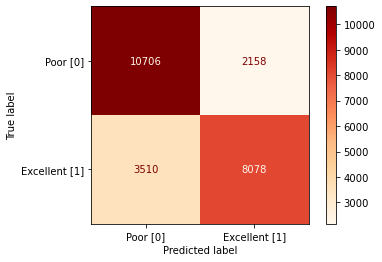

TN: 10706, FP: 2158, FN: 3510, TP: 8078
Accuracy: 0.76820
Recall: 0.69710
Precision: 0.78918
F1: 0.74029
ROC_AUC: 0.76467


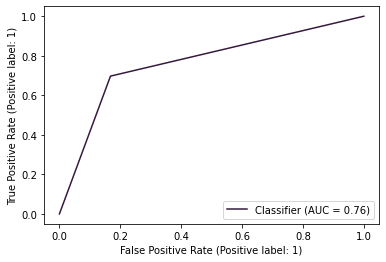

-------------------- Overall Test Result--------------------
Confusion Matrix:


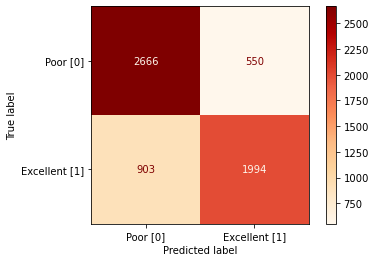

TN: 2666, FP: 550, FN: 903, TP: 1994
Accuracy: 0.76231
Recall: 0.68830
Precision: 0.78381
F1: 0.73295
ROC_AUC: 0.75864


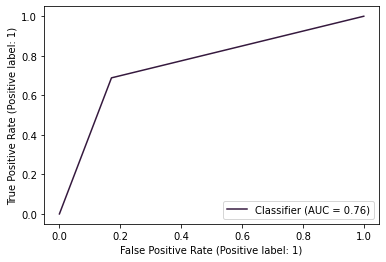

In [111]:
roc_auc_train_sub_1, roc_auc_test_sub_2 = stratified_k_fold_model_fit(X_sub_1, y, rf_sub_1, 5, shuffle=True, plot_confusion_matrix=False, plot_roc=False, hide_fold_result=True)

In [112]:
# Write the decision tree as a dot file
visual_tree = rf_sub_1.estimators_[0]
export_graphviz(visual_tree, out_file = 'image/random_forest_sub_1.dot', feature_names = X_sub_1.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('image/random_forest_sub_1.dot')

# MacOs need to brew install gprof2dot
graph.write_png('image/random_forest_sub_1.png')

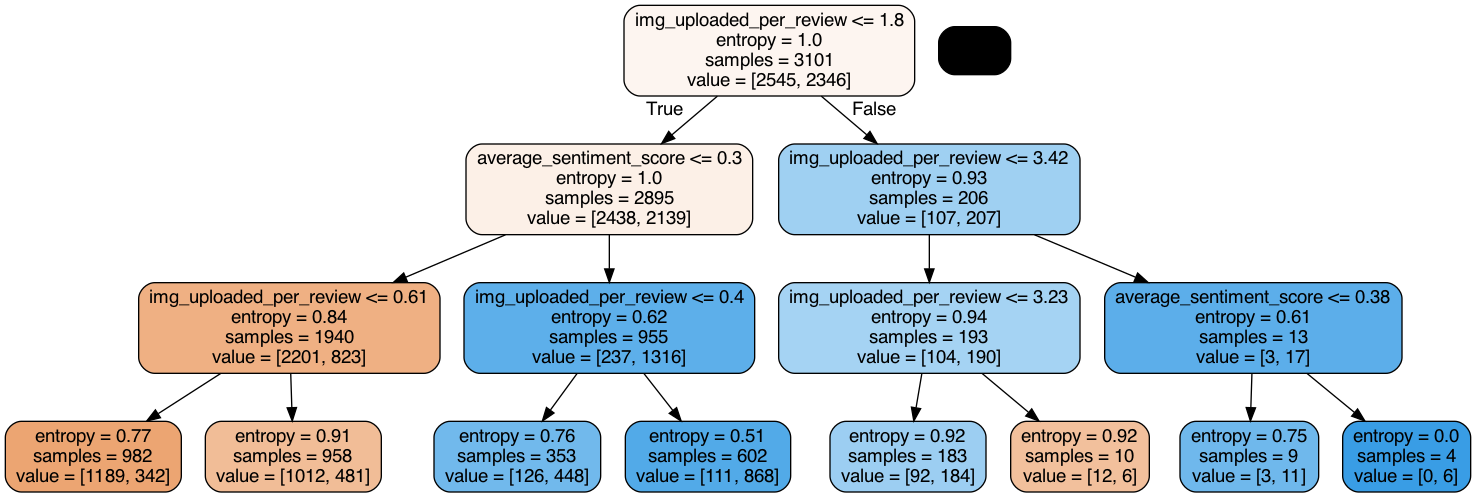

In [113]:
Image('image/random_forest_sub_1.png') 

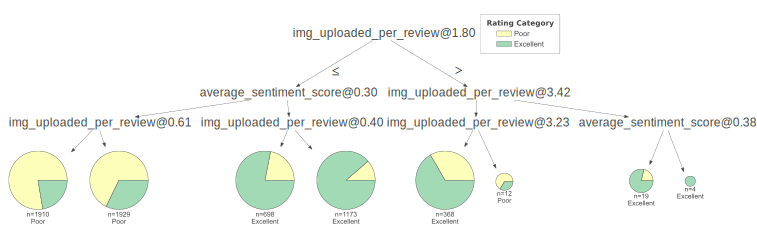

In [151]:
viz = dtreeviz(
    rf_sub_1.estimators_[0], 
    X_sub_1, y['average_rating_category'],
    target_name="Rating Category",
    feature_names=X_sub_1.columns,
    class_names=["Poor", "Excellent"],
    fancy=False,
)

viz

### Most Important "Controllable" Features
1. Locational Features
- walking_distance
- is_in_mall
- above_median_dist_from_nearby_attraction
2. Operating Hours Features
- total_operating_hours
- num_of_days_open
3. Price and Other Services Features
- price_category
- feature_reservations

In [181]:
X_sub_2 = X[["walking_distance", 
                "is_in_mall", 
                "above_median_dist_from_nearby_attraction",
                "nearest_train_line_color_green",
                "nearest_train_line_color_blue"]].copy()

rf_sub_2 = RandomForestClassifier(
    n_estimators=2500,           
    max_depth=5,
    max_features="auto",      
    min_samples_leaf=3,       
    criterion="entropy",  
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

roc_auc_train_sub_2, roc_auc_test_sub_2 = stratified_k_fold_model_fit(X_sub_2, y, rf_sub_2, 5, shuffle=True,plot_confusion_matrix=False, plot_roc=False, hide_fold_result=True)

-------------------- Overall Train Result--------------------
Confusion Matrix:
[[8568 4296]
 [5276 6312]]
TN: 8568, FP: 4296, FN: 5276, TP: 6312
Accuracy: 0.60854
Recall: 0.54470
Precision: 0.59502
F1: 0.56875
ROC_AUC: 0.60537
-------------------- Overall Test Result--------------------
Confusion Matrix:
[[2050 1166]
 [1422 1475]]
TN: 2050, FP: 1166, FN: 1422, TP: 1475
Accuracy: 0.57664
Recall: 0.50915
Precision: 0.55850
F1: 0.53268
ROC_AUC: 0.57329


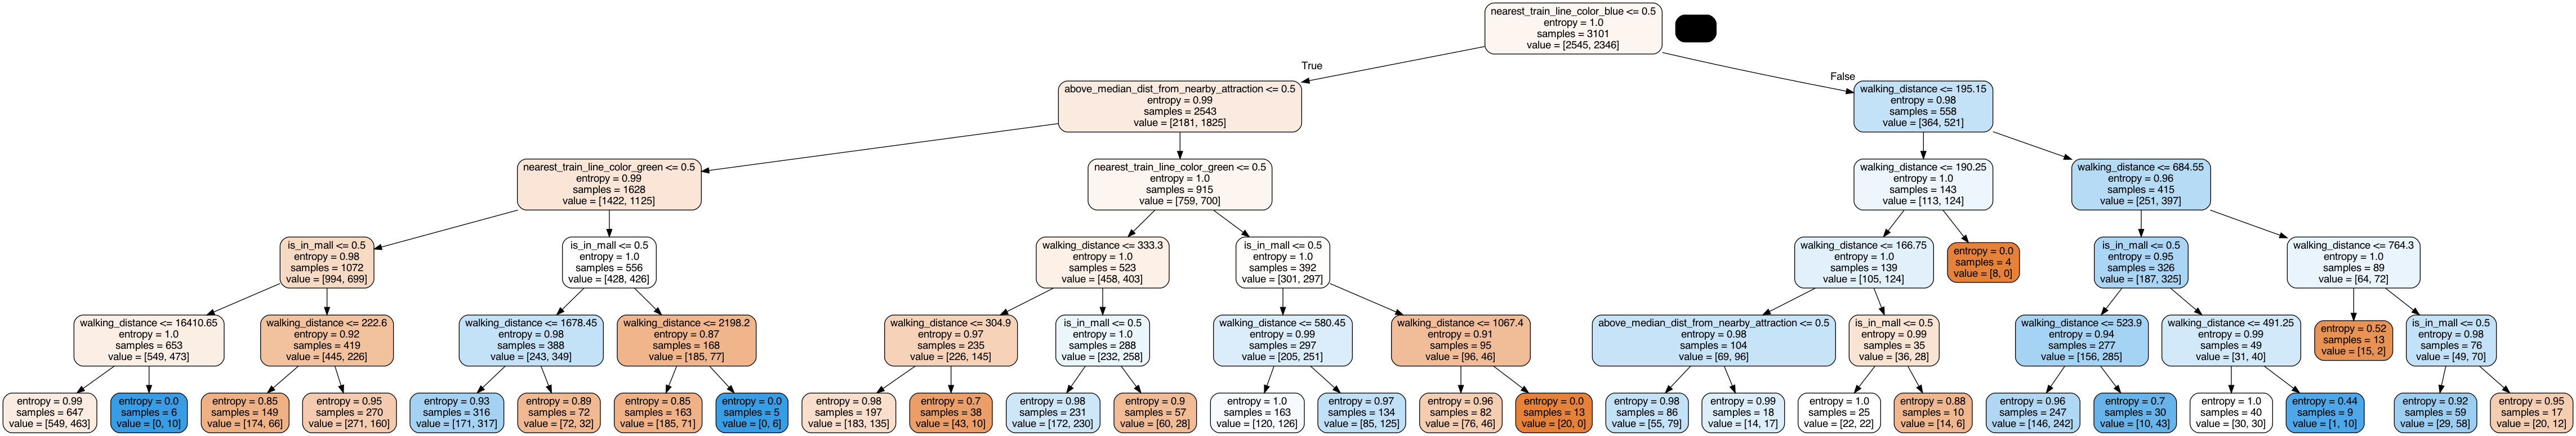

In [182]:
# Write the decision tree as a dot file
visual_tree = rf_sub_2.estimators_[0]
export_graphviz(visual_tree, out_file = 'image/random_forest_sub_2.dot', feature_names = X_sub_2.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('image/random_forest_sub_2.dot')

# MacOs need to brew install gprof2dot
graph.write_png('image/random_forest_sub_2.png')

Image('image/random_forest_sub_2.png') 

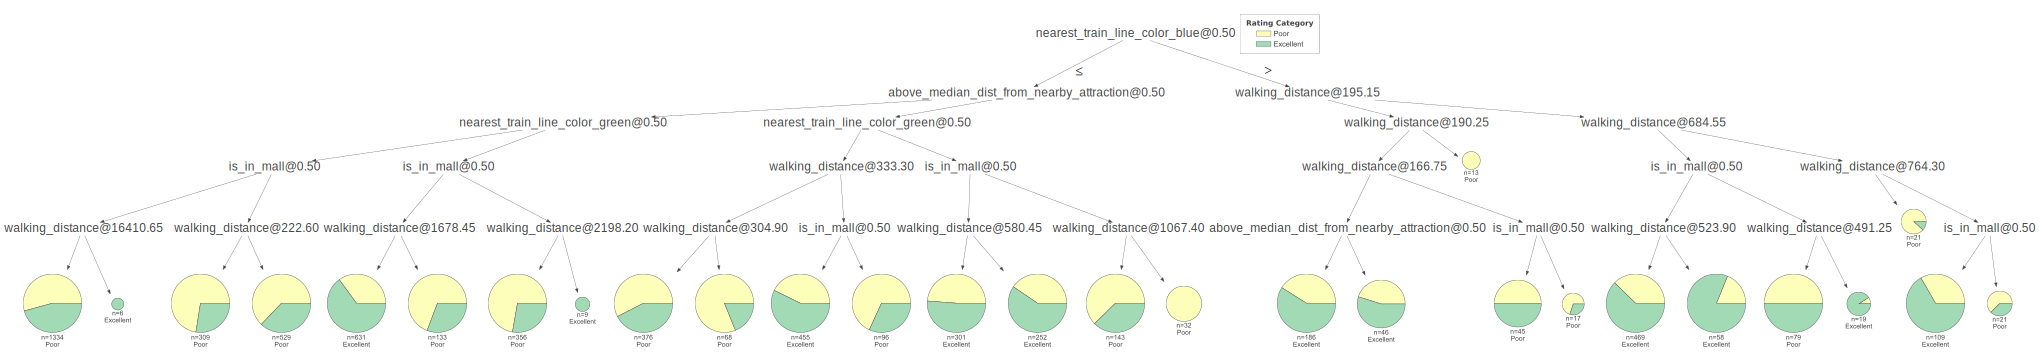

In [183]:
viz_2 = dtreeviz(
    rf_sub_2.estimators_[0], 
    X_sub_2, y['average_rating_category'],
    target_name="Rating Category",
    feature_names=X_sub_2.columns,
    class_names=["Poor", "Excellent"],
    fancy=False,
)

viz_2

In [160]:
X_sub_3 = X[["price_category", "has_cuisines", "cuisine_chinese", "cuisine_asian", "cuisine_japanese"]].copy()

rf_sub_3 = RandomForestClassifier(
    n_estimators=2500,           
    # max_depth=5,
    max_features="auto",      
    min_samples_leaf=3,       
    criterion="entropy",  
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

roc_auc_train_sub_3, roc_auc_test_sub_3 = stratified_k_fold_model_fit(X_sub_3, y, rf_sub_3, 5, shuffle=True, plot_confusion_matrix=False, plot_roc=False, hide_fold_result=True)

-------------------- Overall Train Result--------------------
Confusion Matrix:
[[10684  2180]
 [ 8624  2964]]
TN: 10684, FP: 2180, FN: 8624, TP: 2964
Accuracy: 0.55815
Recall: 0.25578
Precision: 0.57621
F1: 0.35429
ROC_AUC: 0.54316
-------------------- Overall Test Result--------------------
Confusion Matrix:
[[2636  580]
 [2182  715]]
TN: 2636, FP: 580, FN: 2182, TP: 715
Accuracy: 0.54818
Recall: 0.24681
Precision: 0.55212
F1: 0.34113
ROC_AUC: 0.53323


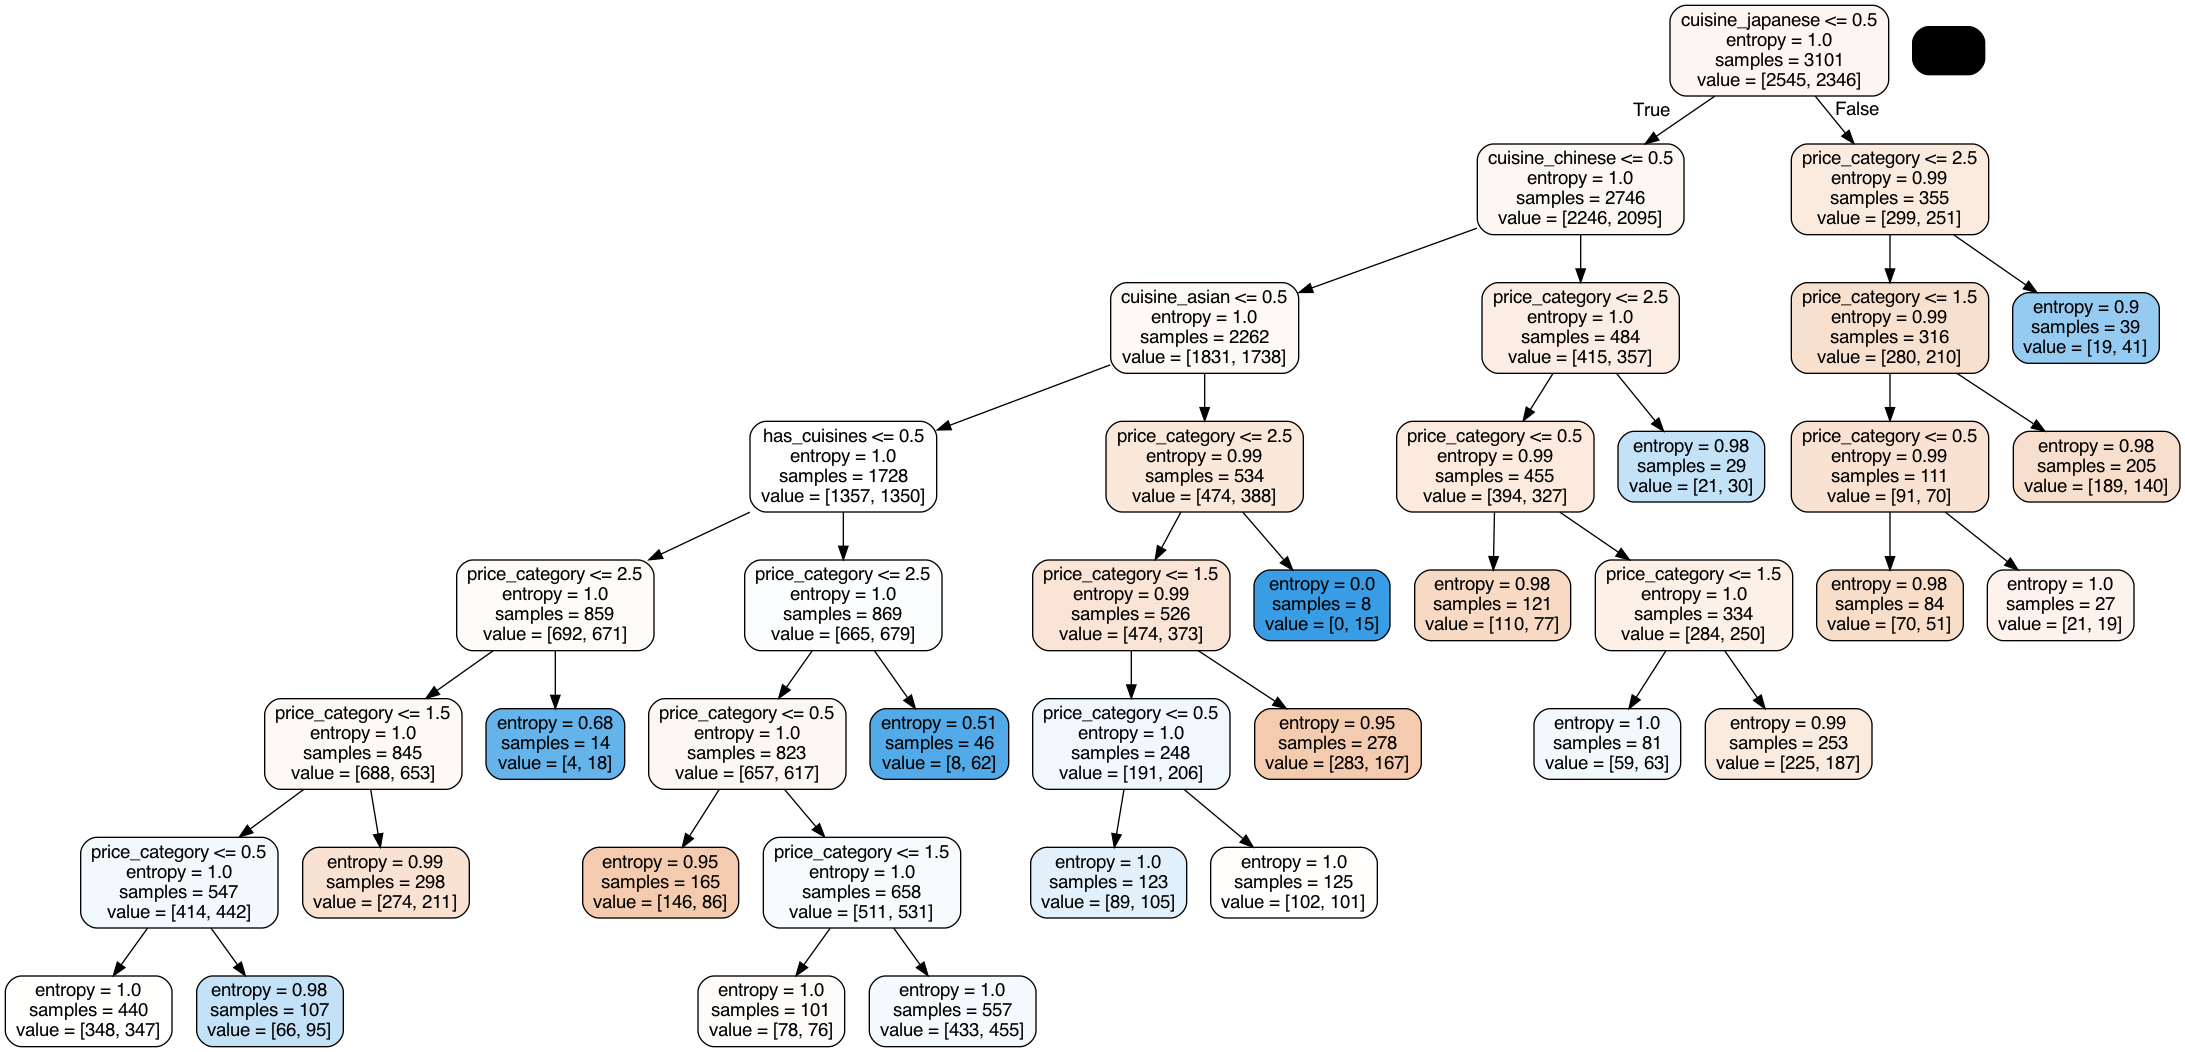

In [161]:
# Write the decision tree as a dot file
visual_tree = rf_sub_3.estimators_[0]
export_graphviz(visual_tree, out_file = 'image/random_forest_sub_3.dot', feature_names = X_sub_3.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('image/random_forest_sub_3.dot')

# MacOs need to brew install gprof2dot
graph.write_png('image/random_forest_sub_3.png')

Image('image/random_forest_sub_3.png') 

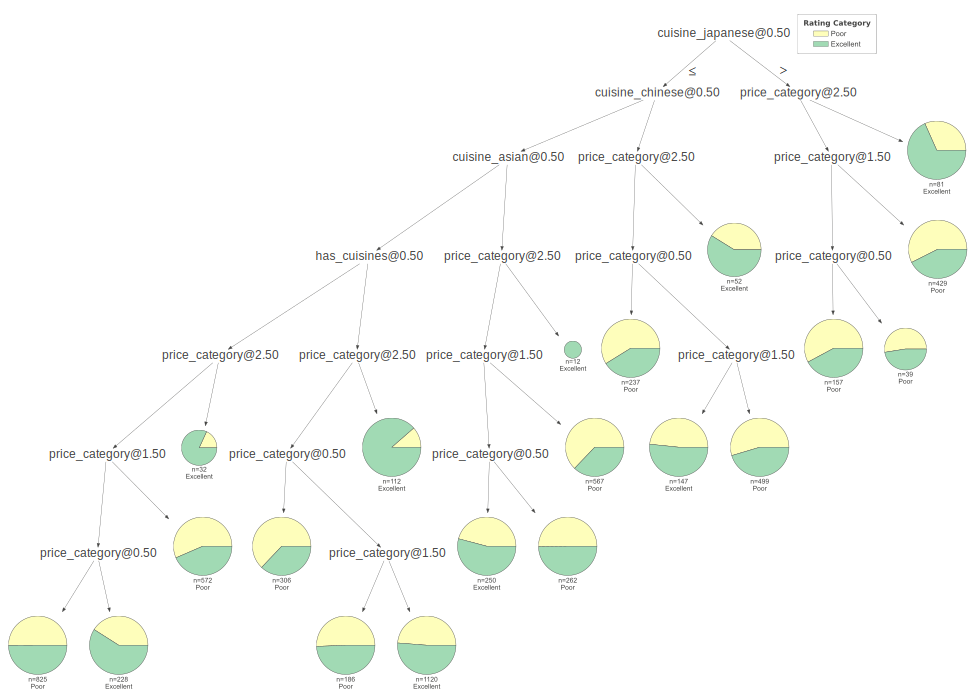

In [162]:
viz_3 = dtreeviz(
    rf_sub_3.estimators_[0], 
    X_sub_3, y['average_rating_category'],
    target_name="Rating Category",
    feature_names=X_sub_3.columns,
    class_names=["Poor", "Excellent"],
    fancy=False,
)

viz_3

In [167]:
X_sub_4 = X[["total_operating_hours", "num_of_days_open"]].copy()

rf_sub_4 = RandomForestClassifier(
    n_estimators=2500,           
    max_depth=5,
    max_features="auto",      
    min_samples_leaf=3,       
    criterion="entropy",  
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

roc_auc_train_sub_4, roc_auc_test_sub_4 = stratified_k_fold_model_fit(X_sub_4, y, rf_sub_4, 5, shuffle=True, plot_confusion_matrix=False, plot_roc=False, hide_fold_result=True)

-------------------- Overall Train Result--------------------
Confusion Matrix:
[[10376  2488]
 [ 7535  4053]]
TN: 10376, FP: 2488, FN: 7535, TP: 4053
Accuracy: 0.59009
Recall: 0.34976
Precision: 0.61963
F1: 0.44713
ROC_AUC: 0.57818
-------------------- Overall Test Result--------------------
Confusion Matrix:
[[2561  655]
 [1915  982]]
TN: 2561, FP: 655, FN: 1915, TP: 982
Accuracy: 0.57958
Recall: 0.33897
Precision: 0.59988
F1: 0.43317
ROC_AUC: 0.56765


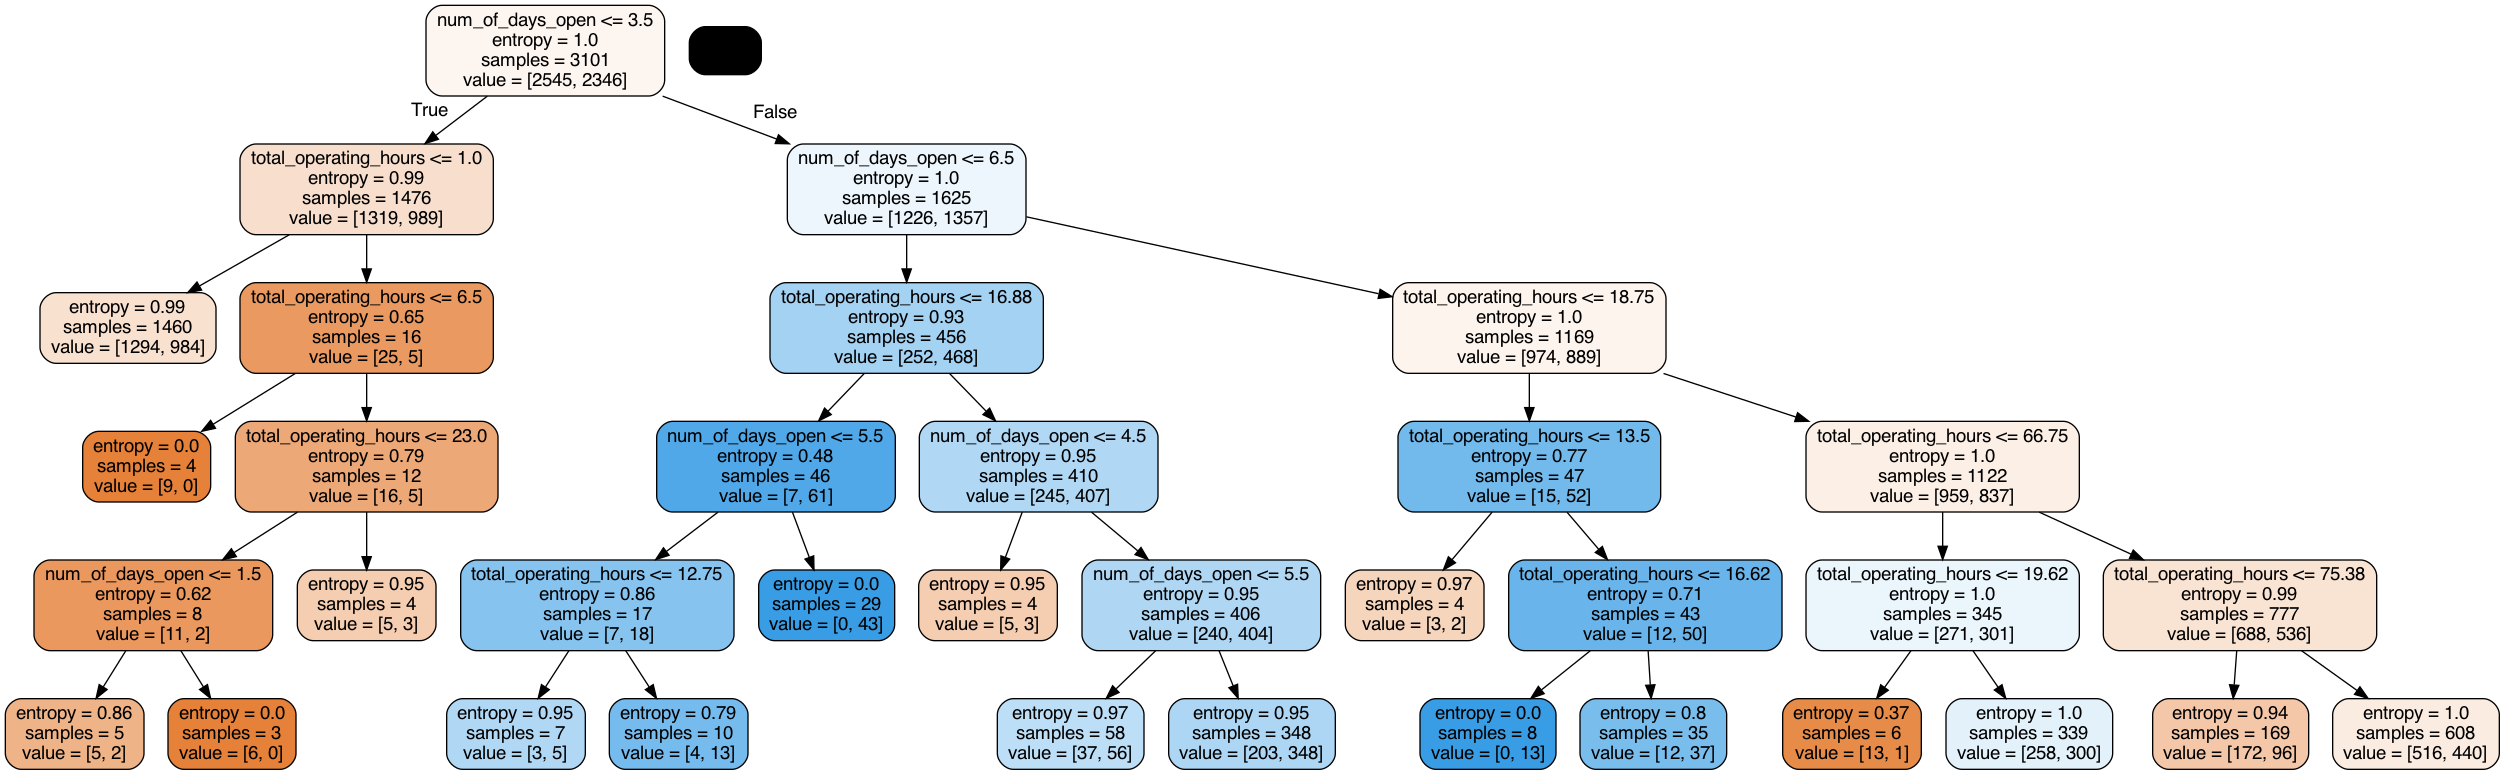

In [168]:
# Write the decision tree as a dot file
visual_tree = rf_sub_4.estimators_[0]
export_graphviz(visual_tree, out_file = 'image/random_forest_sub_4.dot', feature_names = X_sub_4.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('image/random_forest_sub_4.dot')

# MacOs need to brew install gprof2dot
graph.write_png('image/random_forest_sub_4.png')

Image('image/random_forest_sub_4.png') 

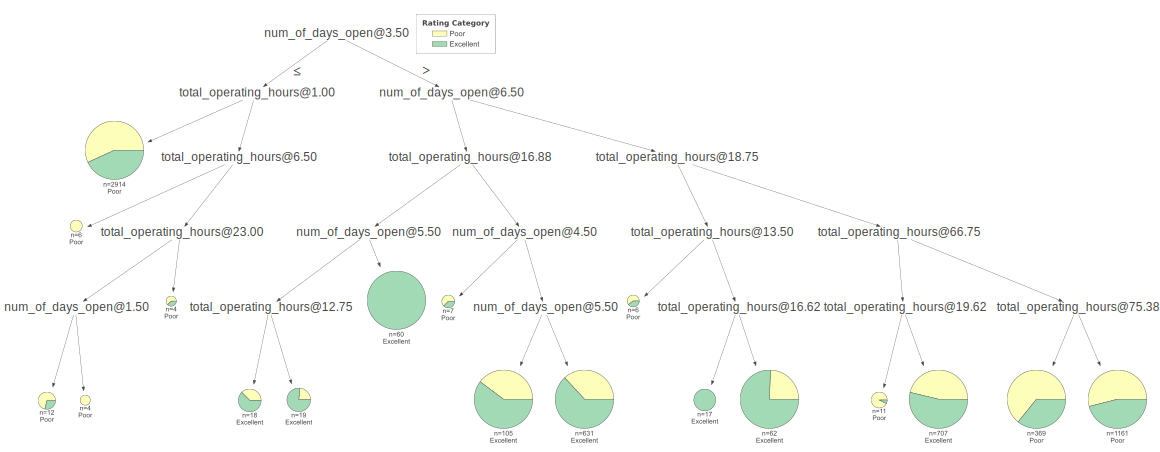

In [169]:
viz_4 = dtreeviz(
    rf_sub_4.estimators_[0], 
    X_sub_4, y['average_rating_category'],
    target_name="Rating Category",
    feature_names=X_sub_4.columns,
    class_names=["Poor", "Excellent"],
    fancy=False,
)

viz_4

In [170]:
X_sub_5 = X[["feature_reservations", "has_features", "feature_seating", "diet_gluten_free_options"]].copy()

rf_sub_5 = RandomForestClassifier(
    n_estimators=2500,           
    max_depth=5,
    max_features="auto",      
    min_samples_leaf=3,       
    criterion="entropy",  
    bootstrap=True,
    oob_score=True,
    random_state=2022,
    n_jobs=-1
)

roc_auc_train_sub_5, roc_auc_test_sub_5 = stratified_k_fold_model_fit(X_sub_5, y, rf_sub_5, 5, shuffle=True, plot_confusion_matrix=False, plot_roc=False, hide_fold_result=True)

-------------------- Overall Train Result--------------------
Confusion Matrix:
[[12688   176]
 [10660   928]]
TN: 12688, FP: 176, FN: 10660, TP: 928
Accuracy: 0.55685
Recall: 0.08008
Precision: 0.84058
F1: 0.14623
ROC_AUC: 0.53320
-------------------- Overall Test Result--------------------
Confusion Matrix:
[[3172   44]
 [2665  232]]
TN: 3172, FP: 44, FN: 2665, TP: 232
Accuracy: 0.55685
Recall: 0.08008
Precision: 0.84058
F1: 0.14623
ROC_AUC: 0.53320


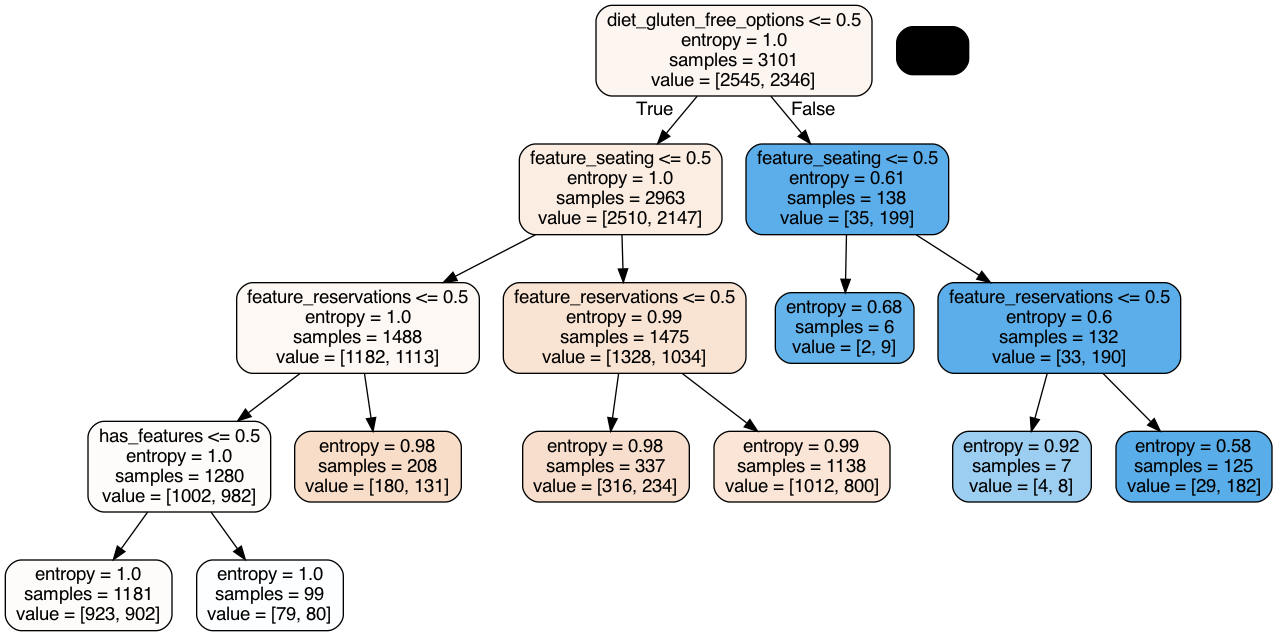

In [171]:
# Write the decision tree as a dot file
visual_tree = rf_sub_5.estimators_[0]
export_graphviz(visual_tree, out_file = 'image/random_forest_sub_5.dot', feature_names = X_sub_5.columns, 
                precision = 2, filled = True, rounded = True, max_depth = None)

# Import the dot file to a graph and then convert to a png
(graph, ) = pydot.graph_from_dot_file('image/random_forest_sub_5.dot')

# MacOs need to brew install gprof2dot
graph.write_png('image/random_forest_sub_5.png')

Image('image/random_forest_sub_5.png')

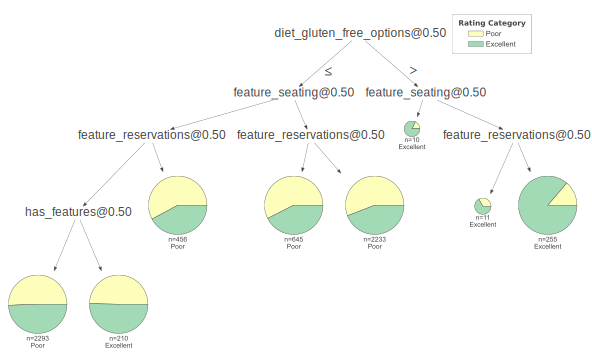

In [172]:
viz_5 = dtreeviz(
    rf_sub_5.estimators_[0], 
    X_sub_5, y['average_rating_category'],
    target_name="Rating Category",
    feature_names=X_sub_5.columns,
    class_names=["Poor", "Excellent"],
    fancy=False,
)

viz_5